In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [2]:
# Input data
X = np.array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0]).reshape(-1, 1)
y = np.array([4.2, 7.8, 11.5, 15.2, 18.9, 22.6, 26.3, 30.0, 33.7, 37.4, 41.1, 44.8, 48.5, 52.2, 55.9, 59.6, 63.3, 67.0, 70.7, 74.4, 78.1, 81.8, 85.5, 89.2, 92.9])


In [3]:
# Initialize variables
degrees = [1, 2, 3, 4, 5]
errors = []

In [4]:
# Perform polynomial regression for each degree
for degree in degrees:
    # Create polynomial features
    polynomial_features = PolynomialFeatures(degree=degree)
    X_poly = polynomial_features.fit_transform(X)

    # Fit the linear regression model
    model = LinearRegression()
    model.fit(X_poly, y)

    # Make predictions
    y_pred = model.predict(X_poly)

    # Calculate mean squared error
    mse = mean_squared_error(y, y_pred)
    errors.append(mse)

In [5]:
# Print the results
for degree, error in zip(degrees, errors):
    print(f"Degree {degree}: MSE = {error:.2f}")

Degree 1: MSE = 0.00
Degree 2: MSE = 0.00
Degree 3: MSE = 0.00
Degree 4: MSE = 0.00
Degree 5: MSE = 0.00


In [6]:
# Find the degree with the minimum error
best_degree = degrees[np.argmin(errors)]
print(f"\nBest degree: {best_degree}")


Best degree: 5


In [7]:
# Re-calculate the best polynomial regression
best_polynomial_features = PolynomialFeatures(degree=best_degree)
X_poly_best = best_polynomial_features.fit_transform(X)

In [8]:
best_model = LinearRegression()
best_model.fit(X_poly_best, y)
y_pred_best = best_model.predict(X_poly_best)
best_mse = mean_squared_error(y, y_pred_best)

In [9]:
print(f"Best Polynomial Regression (Degree {best_degree}):")
print("Coefficients:", best_model.coef_)
print("Intercept:", best_model.intercept_)
print("MSE:", best_mse)

Best Polynomial Regression (Degree 5):
Coefficients: [ 0.00000000e+00  3.61944804e+00  1.50810487e-02 -1.24285289e-03
  4.65664588e-05 -6.48393731e-07]
Intercept: 0.5439999951419736
MSE: 9.067138225759178e-05


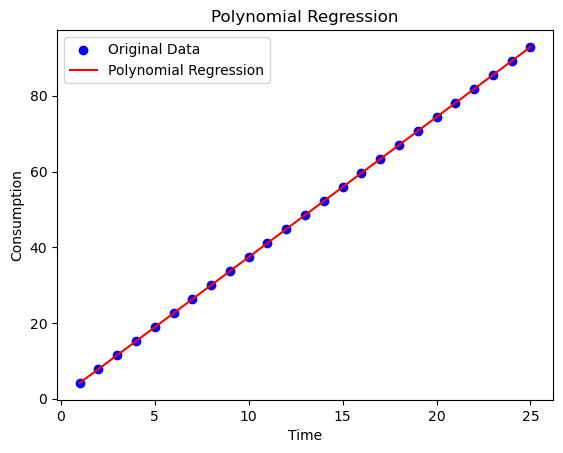

In [10]:
import matplotlib.pyplot as plt

# Plot original data
plt.scatter(X, y, color='blue', label='Original Data')

# Plot predicted line
plt.plot(X, y_pred_best, color='red', label='Polynomial Regression')

# Set plot labels and title
plt.xlabel('Time')
plt.ylabel('Consumption')
plt.title('Polynomial Regression')
plt.legend()

# Display the plot
plt.show()